# Preamble

In [1]:
include("./parallelPlanner.jl")
include("./GA.jl")
include("./parallelCGA.jl")
include("./plottingUtils.jl")
include("demo_utils.jl")

ma_demo (generic function with 1 method)

# Recap: Single agent planning

In my previous demo I showed my working single-agent planner. 

It was able to:

- Avoid obstacles of circular and rectangular shape
- Avoid leaving the predefined road-space

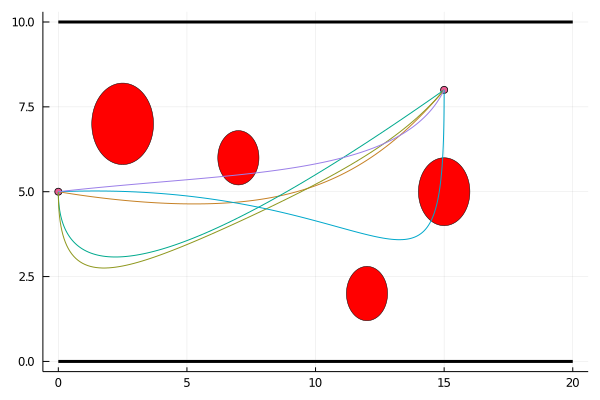

In [2]:
sa_demo()

Below you can see an example of the learning process over the course of 100 generations for a simliar road space problem

![foo](https://sambarrett.online/Y4-Diss/100gens-3.gif)

# Multi-agent planning

I have since expanded this solution to allow for the planning of multiple agents within the same stretch of road. A key factor of this extension is making sure the  routes do not collide. 

How do I differentiate between path intersection (legal) and route collision (illegal)? 

I make an assumption that all agents are travelling at the same constant speed.

The routes are defined as Bezier Curves and as such the position along the route at any time $t$ is given by $B(t)$, I can therefore say that if $\exists t. B_1(t) == B_2(t)$ then routes $B_1$ and $B_2$ collide at some time $t$ Solving this equation however, is not trivial and as such the common approach to finding intersections between two Bezier curves is to approximate the answer via recursive subdivision, still a very computationally expensive procedure


At one point this process alone resulted in a $\approx 50\times$ slowdown! To tackle this issue, I parallelised my `bezInt` function so that it can take advantage of the 16 cores in my system.

`collisionDetection` then wraps this result and works out the lengths of the road segments in which the intersection is detected and derives whether they collide.

In [3]:
P = ma_demo();

(start, goal, c) = (Point(0, 5), Point(20, 8), 1)
(start, goal, c) = (Point(0, 8), Point(18, 3), 2)
(start, goal, c) = (Point(0, 6), Point(15, 5), 3)
fetching results
Size of other_routes = 3
accessing routes at 2
i = Individual(Phenotype(Point(0, 5), Point[Point(0, 5), Point(2.65, 5.333333333333333), Point(5.0, 5.666666666666666), Point(7.05, 6.166666666666666), Point(9.3, 6.666666666666666), Point(20, 8)], Point(20, 8)), 20.2368850016697)
real_array = Real[0, 5, 2.65, 5.333333333333333, 5.0, 5.666666666666666, 7.05, 6.166666666666666, 9.3, 6.666666666666666, 20, 8]
Testing fitness of Individual(Phenotype(Point(0, 5), Point[Point(0, 5), Point(2.65, 5.333333333333333), Point(5.0, 5.666666666666666), Point(7.05, 6.166666666666666), Point(9.3, 6.666666666666666), Point(20, 8)], Point(20, 8)), 20.2368850016697), wrt. [0.0, 5.0, 2.65, 5.333333333333333, 5.0, 5.666666666666666, 7.05, 6.166666666666666, 9.3, 6.666666666666666, 20.0, 8.0], parallel
Size of other_routes = 3
Testing fitness of 

abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = true
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 2.0951711609826784
Detected collision!
Testing fitness of Individual(Phenotype(Point(0, 5), Point[Point(0, 5), Point(2.65, 5.333333333333333), Point(5.0, 5.666666666666666), Point(7.05, 6.166666666666666), Point(9.3, 6.666666666666666), Point(20, 8)], Point(20, 8)), 20.2368850016697), wrt. [0.0, 5.0, 2.65, 5.333333333333333, 5.0, 5.666666666666666, 7.05, 6.166666666666666, 9.3, 6.666666666666666, 20.0, 8.0], parallel
Found intersection (true, (Point[Point(3.015234375, 5.421875), Point(3.4853515625, 5.3515625), Point(3.9514648437499997, 5.29296875), Point(4.431884765624999, 5.244140625)], Point[Point(5.0, 5.666666666666666), Point(3.825, 5.5), Point(2.575, 5.333333333333333)]))
Intersection
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = true
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 0.8464897628205472
Detected

abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = true
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 2.0951711609826784
Detected collision!
Testing fitness of Individual(Phenotype(Point(0, 5), Point[Point(0, 5), Point(2.65, 5.333333333333333), Point(5.0, 5.666666666666666), Point(7.05, 6.166666666666666), Point(9.3, 6.666666666666666), Point(20, 8)], Point(20, 8)), 0), wrt. [0.0, 5.0, 2.65, 5.333333333333333, 5.0, 5.666666666666666, 7.05, 6.166666666666666, 9.3, 6.666666666666666, 20.0, 8.0], parallel
Found intersection (true, (Point[Point(5.322070312499999, 5.0078125), Point(5.02041015625, 5.01171875), Point(4.728955078124999, 5.017578125), Point(4.440258789062499, 5.0263671875), Point(4.148254394531249, 5.03955078125), Point(3.846588134765624, 5.059326171875), Point(3.5281768798828117, 5.0889892578125), Point(3.185426330566406, 5.13348388671875)], Point[Point(5.0, 5.666666666666666), Point(4.4125, 5.583333333333333), Point(3.80625, 5.5)]))
Intersec

abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = false
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 23.901943510497667
accessing routes at 2
i = Individual(Phenotype(Point(0, 5), Point[Point(0, 5), Point(5.0, 5.666666666666666), Point(7.05, 6.166666666666666), Point(9.3, 6.666666666666666), Point(20.0, 8.118430684362433), Point(20, 8)], Point(20, 8)), 41.94852868066205)
real_array = Real[0, 5, 5.0, 5.666666666666666, 7.05, 6.166666666666666, 9.3, 6.666666666666666, 20.0, 8.118430684362433, 20, 8]
Found intersection (true, (Point[Point(5.322070312499999, 5.0078125), Point(5.02041015625, 5.01171875), Point(4.728955078124999, 5.017578125), Point(4.440258789062499, 5.0263671875), Point(4.148254394531249, 5.03955078125), Point(3.846588134765624, 5.059326171875), Point(3.5281768798828117, 5.0889892578125), Point(3.185426330566406, 5.13348388671875)], Point[Point(5.0, 5.666666666666666), Point(4.4125, 5.583333333333333), Point(3.80625, 5.5)]))
Intersectio

abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = true
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 1.087987011672741
Detected collision!
Testing fitness of Individual(Phenotype(Point(0, 8), Point[Point(0, 8), Point(2.425, 3), Point(6.55, 2.6666666666666665), Point(7.775, 2.0), Point(10.100000000000001, 2.6666666666666665), Point(18, 3)], Point(18, 3)), 20.634624981033244), wrt. [0.0, 5.0, 5.0, 5.666666666666666, 7.05, 6.166666666666666, 9.3, 6.666666666666666, 20.0, 8.118430684362433, 20.0, 8.0], parallel
Found intersection (true, (Point[Point(0, 6), Point(0.559375, 5.875), Point(1.078125, 5.765625), Point(1.574560546875, 5.669921875)], Point[Point(0.0, 5.0), Point(1.25, 5.166666666666666), Point(2.315625, 5.322916666666666)]))
Intersection
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = true
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 0.08057747957473627
Detected collision!
Testing fitness of Individual(Phen

abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = true
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 0.3797428597030361
Detected collision!
Testing fitness of Individual(Phenotype(Point(0, 6), Point[Point(0, 6), Point(1.625, 5), Point(3.65, 4.833333333333333), Point(0.0, 14.340583943137093), Point(7.9, 4.499999999999999), Point(9.925, 4.666666666666666), Point(10.950000000000001, 4.666666666666666), Point(15, 5)], Point(15, 5)), 76.29509558529705), wrt. [0.0, 5.0, 5.0, 5.666666666666666, 7.05, 6.166666666666666, 9.3, 6.666666666666666, 20.0, 8.118430684362433, 20.0, 8.0], parallel
Found intersection (true, (Point[Point(3.0682617187499996, 6.3359375), Point(3.5352050781249997, 6.092447916666666), Point(3.9817138671874996, 5.865234375), Point(4.41046142578125, 5.6533203125)], Point[Point(4.2625, 5.625), Point(3.38125, 5.479166666666666), Point(2.315625, 5.322916666666666)]))
Intersection
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.

abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = false
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 5.613128733294063
Testing fitness of Individual(Phenotype(Point(0, 8), Point[Point(0, 8), Point(8.95, 3), Point(11.299999999999999, 2.6666666666666665), Point(18.0, 13.429388612046557)], Point(18, 3)), 0), wrt. [0.0, 6.0, 9.05, 5.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], parallel
Found intersection (true, (Point[Point(0, 6), Point(1.13125, 5.875), Point(2.2140625000000003, 5.765625)], Point[Point(0.0, 5.0), Point(1.25, 5.166666666666666), Point(2.315625, 5.322916666666666)]))
Intersection
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = false
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 4.908897293374148
Testing fitness of Individual(Phenotype(Point(0, 6), Point[Point(0, 6), Point(9.05, 5), Point(15, 5)], Point(15, 5)), 15.044188688731737), wrt. [0.0, 6.0, 9.05, 5.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], p

abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = false
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 7.724149947440668
Testing fitness of Individual(Phenotype(Point(0, 8), Point[Point(0, 8), Point(8.95, 3), Point(11.299999999999999, 2.6666666666666665), Point(18, 3)], Point(18, 3)), 19.072873106297727), wrt. [0.0, 8.0, 8.95, 3.0, 11.299999999999999, 2.6666666666666665, 18.0, 3.0, 0.0, 0.0, 0.0, 0.0], parallel
Found intersection (true, (Point[Point(0, 6), Point(0.559375, 5.875), Point(1.078125, 5.765625), Point(1.574560546875, 5.669921875)], Point[Point(0.0, 5.0), Point(1.25, 5.166666666666666), Point(2.315625, 5.322916666666666)]))
Intersection
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = true
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 0.08057747957473627
Detected collision!
Testing fitness of Individual(Phenotype(Point(0, 6), Point[Point(0, 6), Point(4.475, 5), Point(6.35, 5), Point(15, 5)], Point(15, 5))

abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = false
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 6.236180458792041
Testing fitness of Individual(Phenotype(Point(0, 6), Point[Point(0, 6), Point(4.475, 5), Point(6.35, 5), Point(15, 5)], Point(15, 5)), 0), wrt. [0.0, 5.0, 5.0, 5.666666666666666, 7.05, 6.166666666666666, 9.3, 6.666666666666666, 20.0, 8.118430684362433, 20.0, 8.0], parallel
Found intersection (true, (Point[Point(3.0682617187499996, 6.3359375), Point(3.5352050781249997, 6.092447916666666), Point(3.9817138671874996, 5.865234375), Point(4.41046142578125, 5.6533203125)], Point[Point(4.2625, 5.625), Point(3.38125, 5.479166666666666), Point(2.315625, 5.322916666666666)]))
Intersection
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = false
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 7.724149947440668
Testing fitness of Individual(Phenotype(Point(0, 8), Point[Point(0, 8), Point(8.95, 3), Point(11.299999

abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = false
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 6.236180458792041
Testing fitness of Individual(Phenotype(Point(0, 6), Point[Point(0, 6), Point(4.475, 5), Point(6.35, 5), Point(15, 5)], Point(15, 5)), 0), wrt. [0.0, 5.0, 5.0, 5.666666666666666, 7.05, 6.166666666666666, 9.3, 6.666666666666666, 20.0, 8.118430684362433, 20.0, 8.0], parallel
Found intersection (true, (Point[Point(3.0682617187499996, 6.3359375), Point(3.5352050781249997, 6.092447916666666), Point(3.9817138671874996, 5.865234375), Point(4.41046142578125, 5.6533203125)], Point[Point(4.2625, 5.625), Point(3.38125, 5.479166666666666), Point(2.315625, 5.322916666666666)]))
Intersection
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = false
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 7.724149947440668
Testing fitness of Individual(Phenotype(Point(0, 8), Point[Point(0, 8), Point(8.95, 3), Point(11.299999

abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = false
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 6.236180458792041
Testing fitness of Individual(Phenotype(Point(0, 6), Point[Point(0, 6), Point(4.475, 5), Point(0.0, 2.272477318958114), Point(15, 5)], Point(15, 5)), 75.39770503456617), wrt. [0.0, 5.0, 5.0, 5.666666666666666, 7.05, 6.166666666666666, 9.3, 6.666666666666666, 20.0, 8.118430684362433, 20.0, 8.0], parallel
Found intersection (true, (Point[Point(3.0682617187499996, 6.3359375), Point(3.5352050781249997, 6.092447916666666), Point(3.9817138671874996, 5.865234375), Point(4.41046142578125, 5.6533203125)], Point[Point(4.2625, 5.625), Point(3.38125, 5.479166666666666), Point(2.315625, 5.322916666666666)]))
Intersection
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = false
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 7.724149947440668
Testing fitness of Individual(Phenotype(Point(0, 8), Point[Point(0, 8), 

abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = false
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 11.83793683469758
Testing fitness of Individual(Phenotype(Point(0, 8), Point[Point(0.0, 0.0), Point(8.95, 3), Point(11.299999999999999, 2.6666666666666665), Point(18, 3)], Point(18, 3)), 0), wrt. [0.0, 5.0, 5.0, 5.666666666666666, 7.05, 6.166666666666666, 9.3, 6.666666666666666, 20.0, 8.118430684362433, 20.0, 8.0], parallel
Found intersection (true, (Point[Point(0, 6), Point(0.3454906710935184, 6.552091223005775), Point(0.647795008300347, 7.020610407663007), Point(0.914623839797363, 7.41451335151745)], Point[Point(0.0, 8.0), Point(1.11875, 7.375), Point(2.134375, 6.822916666666666)]))
Intersection
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = true
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 1.5082122958616662
Detected collision!
Testing fitness of Individual(Phenotype(Point(0, 6), Point[Point(0, 6), Point(4.4

abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = false
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 7.724149947440668
Found intersection (true, (Point[Point(0, 6), Point(0.559375, 5.875), Point(1.078125, 5.765625), Point(1.574560546875, 5.669921875)], Point[Point(0.0, 5.0), Point(1.25, 5.166666666666666), Point(2.315625, 5.322916666666666)]))
Intersection
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = true
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 0.08057747957473627
Found intersection (true, (Point[Point(3.0682617187499996, 6.3359375), Point(3.5352050781249997, 6.092447916666666), Point(3.9817138671874996, 5.865234375), Point(4.41046142578125, 5.6533203125)], Point[Point(4.2625, 5.625), Point(3.38125, 5.479166666666666), Point(2.315625, 5.322916666666666)]))
Intersection
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = false
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) 

In [4]:
plot_generation_gif(road,P)

LoadError: [91mUndefVarError: road not defined[39m

In [5]:
p12 =collisionDetection(P[1],P[2]);
p13 =  collisionDetection(P[1],P[3]);
p32= collisionDetection(P[3],P[2]);


Detecting Collisions
Found intersection (true, (Point[Point(4.966308593750001, 5.766383261977964), Point(4.538427734375, 5.6920166909193775), Point(4.1083740234375, 5.6182594170915525), Point(3.6689819335937504, 5.544539098528375), Point(3.2123474121093754, 5.4702151296721535), Point(2.7308197021484375, 5.394708610248393)], Point[Point(3.3430664062499993, 6.2265625), Point(3.8950683593749993, 5.94921875), Point(4.442993164062499, 5.681640625), Point(4.984606933593749, 5.4248046875)]))
Intersection
abs(bezLength(i1_to_intersect) - bezLength(i2_to_intersect)) = 7.218888887815536
Detecting Collisions
Found intersection (true, (Point[Point(0, 5), Point(0.3125, 5.041666666666666), Point(0.6134765625, 5.082682291666666), Point(0.90369873046875, 5.123087565104166), Point(1.1840133666992188, 5.162935156718206), Point(1.4553141593933105, 5.202285654355361)], Point[Point(0, 6), Point(1.13125, 5.875), Point(2.2140625000000003, 5.765625)]))
Intersection
abs(bezLength(i1_to_intersect) - bezLength(i

In [6]:
@show p12,p13,p32


(p12, p13, p32) = (false, true, true)


(false, true, true)

# Macro level route planning

Planning routes for vehicles is not just about routing a single set of vehicles through a set section of road. There is a bigger picture: a interconnected network of roads with vehicles traversing multiple different sections of road to get from $A \rightarrow B$ 

To implement this, I used a graphing library in which I can attach metadata to edges. The metadata I chose to attach was the `Road` structure I have been using for my micro-level planning. I can then perform Dijkstra's algorithm on this road network, weighting each edge with the `Road.length` attribute. 

Each agent can then be assigned a series of road segments it must traverse in order to reach it's global goal position.

In [7]:
desired_paths = [
    (1,4),
    (4,2),
    (1,4),
    (3,5)
]

4-element Array{Tuple{Int64,Int64},1}:
 (1, 4)
 (4, 2)
 (1, 4)
 (3, 5)

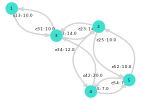

In [8]:
include("demoRoadNetwork.jl")

In [9]:
plans = planRoutes(desired_paths, rn)

checking for agent (1, 4)
checking for agent (4, 2)
checking for agent (1, 4)
already analysed
already analysed
already analysed
already analysed
checking for agent (3, 5)
already analysed
already analysed
pathGroupings = Dict{Any,Any}((2, 5) => [4, 1, 3],(3, 2) => [4, 1, 3],(5, 2) => [2],(5, 4) => [3, 1],(1, 3) => [3, 1],(4, 5) => [2])
macroPath = [1, 3, 2, 5, 4]
plotting routes in (1, 3)
parallel_agents = pathGroupings[microPath] = [3, 1]
(start, goal, c) = (Point(0, 0.5), Point(10, 1.0), 1)
(start, goal, c) = (Point(0, 6.5), Point(10, 7.0), 2)
fetching results
Size of other_routes = 2
accessing routes at 2
i = Individual(Phenotype(Point(0, 0.5), Point[Point(0, 0.5), Point(2.85, 0.6), Point(4.4, 0.7), Point(10, 1.0)], Point(10, 1.0)), 10.012800634986993)
real_array = Real[0, 0.5, 2.85, 0.6, 4.4, 0.7, 10, 1.0, 0.0, 0.0, 0.0, 0.0]
Size of other_routes = 2
Testing fitness of Individual(Phenotype(Point(0, 6.5), Point[Point(0, 6.5), Point(0.9166666666666666, 6.4), Point(2.433333333333333,

                        x == agent)), parallel_agents)]]) = Any[Individual(Phenotype(Point(0, 0.5), Point[Point(0, 0.5), Point(2.85, 0.6), Point(4.4, 0.7), Point(10, 1.0)], Point(10, 1.0)), 10.012800634986993)]
append!(plans[agent], [res[findfirst((x->(#= /home/sam/git-clones/Y4-Diss/code/julia/src/parallelPlanner.jl:174 =#
                        x == agent)), parallel_agents)]]) = Any[Individual(Phenotype(Point(0, 6.5), Point[Point(0, 6.5), Point(1.85, 6.4), Point(4.0, 6.5), Point(10, 7.0)], Point(10, 7.0)), 10.020490286358633)]
planned microPath (1, 3), removing from pathGroupings
plotting routes in (3, 2)
parallel_agents = pathGroupings[microPath] = [4, 1, 3]
(start, goal, c) = (Point(0, 0.5), Point(14, 1.0), 1)
(start, goal, c) = (Point(0, 7.0), Point(14, 5.0), 2)
(start, goal, c) = (Point(0, 1.0), Point(14, 9.0), 3)
fetching results
Size of other_routes = 3
accessing routes at 2
i = Individual(Phenotype(Point(0, 0.5), Point[Point(0, 0.5), Point(3.9, 0.6), Point(14, 1.0)], Point(1

abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = true
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 1.26833714272051
Detected collision!
Testing fitness of Individual(Phenotype(Point(0, 1.0), Point[Point(0, 1.0), Point(2.066666666666667, 0.6), Point(3.2333333333333334, 0.8), Point(7.4, 2.4000000000000004), Point(14, 9.0)], Point(14, 9.0)), 83.82693433930682), wrt. [0.0, 0.5, 3.9, 0.6, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], parallel
Testing fitness of Individual(Phenotype(Point(0, 7.0), Point[Point(0, 7.0), Point(9.2, 5.0), Point(14, 5.0)], Point(14, 5.0)), 14.178508730241404), wrt. [0.0, 0.5, 3.9, 0.6, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], parallel
Found intersection (true, (Point[Point(0, 0.5), Point(0.296875, 0.5125), Point(0.590625, 0.525), Point(0.8802734375, 0.5375000000000001), Point(1.1652922419591598, 0.550230431160972), Point(1.4456000002217149, 0.5635081363292523)], Point[Point(0.0, 0.0), Point(0.0, 0.0), Point(0.0, 0.0)]))
Intersec

Found intersection (true, (Point[Point(0, 1.0), Point(0.35, 1.075), Point(0.6984375, 1.146875), Point(1.042578125, 1.2140625), Point(1.3764055750321698, 1.2760004303031451), Point(1.693045142718868, 1.33269719507626), Point(1.9862406462434736, 1.3844789713036978)], Point[Point(0.0, 0.5), Point(0.975, 0.525), Point(2.3375, 0.5687500000000001)]))
Intersection
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = true
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 0.07120768085603046
Detected collision!
Testing fitness of Individual(Phenotype(Point(0, 1.0), Point[Point(0, 1.0), Point(1.6833333333333333, 2.4), Point(2.7666666666666666, 1.7999999999999998), Point(4.15, 1.4), Point(-6.525707285117499, -2.4146503603560125), Point(7.116666666666667, 2.0), Point(9.4, 3.2), Point(14, 9.0)], Point(14, 9.0)), 0), wrt. [0.0, 0.5, 3.9, 0.6, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], parallel
Testing fitness of Individual(Phenotype(Point(0, 7.0), Point[Point(0, 7.0), Poi

abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = true
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 0.2544478868304658
Found intersection (true, (Point[Point(0, 1.0), Point(0.5166666666666667, 0.9), Point(0.9770833333333333, 0.8375), Point(1.4421875, 0.825), Point(1.95546875, 0.8859375)], Point[Point(0.0, 0.0), Point(0.0, 0.0), Point(0.0, 0.0)]))
Intersection
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = false
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 4.224357284335439
"Final solution $(P_2filtered[1])" = "Final solution Individual(Phenotype(Point(0, 7.0), Point[Point(0, 7.0), Point(9.2, 5.0), Point(14, 5.0)], Point(14, 5.0)), 14.178508730241404)"
Found intersection (true, (Point[Point(0, 1.0), Point(0.5166666666666667, 0.9), Point(0.9770833333333333, 0.8375), Point(1.4421875, 0.825), Point(1.95546875, 0.8859375)], Point[Point(0.0, 0.5), Point(0.975, 0.525), Point(2.3375, 0.5687500000000001)]))
Intersectio

abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = false
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 4.357031250000001
Testing fitness of Individual(Phenotype(Point(0, 9.0), Point[Point(0, 9.0), Point(4.75, 9.0), Point(8.9, 9.0), Point(10, 9.0)], Point(10, 9.0)), 0), wrt. [0.0, 1.0, 2.45, 1.0, 5.1, 1.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0], parallel
Testing fitness of Individual(Phenotype(Point(0, 5.0), Point[Point(0, 5.0), Point(1.4166666666666667, 5.0), Point(2.2333333333333334, 5.0), Point(3.75, 5.0), Point(4.466666666666667, 5.0), Point(5.783333333333333, 5.0), Point(7.3, 5.0), Point(10, 5.0)], Point(10, 5.0)), 0), wrt. [0.0, 1.0, 2.45, 1.0, 5.1, 1.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0], parallel
Found intersection (true, (Point[Point(0, 1.0), Point(0.5073016395406821, 1.0), Point(0.9987153691961936, 1.0), Point(1.4759506408200043, 1.0)], Point[Point(0.0, 0.0), Point(0.0, 0.0), Point(0.0, 0.0)]))
Intersection
abs(bezLength(c1_to_intersect) - bezLength(c2_t

Testing fitness of Individual(Phenotype(Point(0, 5.0), Point[Point(0, 5.0), Point(-5.6268891402298005, 5.0), Point(1.75, 5.0), Point(3.675, 5.0), Point(5.1, 5.0), Point(10, 5.0)], Point(10, 5.0)), 0), wrt. [0.0, 1.0, 2.45, 1.0, 5.1, 1.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0], parallel
Testing fitness of Individual(Phenotype(Point(0, 9.0), Point[Point(0, 9.0), Point(8.061066580174145, 11.99575753599779), Point(5.800000000000001, 9.0), Point(10, 9.0)], Point(10, 9.0)), 0), wrt. [0.0, 1.0, 2.45, 1.0, 5.1, 1.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0], parallel
Testing fitness of Individual(Phenotype(Point(0, 5.0), Point[Point(0, 5.0), Point(1.0888758097325923, -9.334176579910784), Point(1.75, 5.0), Point(3.675, 5.0), Point(5.1, 5.0), Point(10, 5.0)], Point(10, 5.0)), 0), wrt. [0.0, 1.0, 2.45, 1.0, 5.1, 1.0, 10.0, 1.0, 0.0, 0.0, 0.0, 0.0], parallel
Testing fitness of Individual(Phenotype(Point(0, 9.0), Point[Point(0, 9.0), Point(3.961551894934694, 9.0), Point(5.800000000000001, 9.0), Point(10, 9.0)], Point

"Final solution $(P_2filtered[1])" = "Final solution Individual(Phenotype(Point(0, 9.0), Point[Point(0, 9.0), Point(1.4833333333333334, 1.0), Point(3.166666666666667, 0.0), Point(5.45, 0.6), Point(7, 1.0)], Point(7, 1.0)), 12.914013263238735)"
Found intersection (true, (Point[Point(0, 5.0), Point(0.84375, 5.0), Point(1.5859375, 5.03125)], Point[Point(0.7541666666666668, 5.4375), Point(0.5625, 6.21875), Point(0.37395833333333334, 7.109375)]))
Intersection
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = true
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 0.7045972942708332
Detected collision!
Testing fitness of Individual(Phenotype(Point(0, 5.0), Point[Point(0, 5.0), Point(1.4833333333333334, 4.6), Point(3.3666666666666667, 5.0), Point(4.95, 5.0), Point(7, 7.0)], Point(7, 7.0)), 0), wrt. [0.0, 9.0, 1.4833333333333334, 1.0, 3.166666666666667, 0.0, 5.45, 0.6, 7.0, 1.0, 0.0, 0.0], parallel
Found intersection (true, (Point[Point(0, 5.0), Point(0.370833333

Found intersection (true, (Point[Point(-0.018531568642990992, 8.206249623519964), Point(-0.45394823530965767, 8.118749623519964), Point(-0.6079594934782973, 7.797395488226634), Point(-0.4810861764822432, 7.232812217639974), Point(-0.2760490073616824, 6.62851541322998)], Point[Point(0.0, 9.0), Point(0.18541666666666667, 8.0), Point(0.37395833333333334, 7.109375)]))
Intersection
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) < 3.5 = false
abs(bezLength(c1_to_intersect) - bezLength(c2_to_intersect)) = 6.770094136373816
accessing routes at 2
i = Individual(Phenotype(Point(0, 5.0), Point[Point(0, 5.0), Point(3.95, 5.0), Point(7, 7.0)], Point(7, 7.0)), 7.438684567123948)
real_array = Real[0, 5.0, 3.95, 5.0, 7, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
"Final solution $(P_2filtered[1])" = "Final solution Individual(Phenotype(Point(0, 5.0), Point[Point(0, 5.0), Point(3.95, 5.0), Point(7, 7.0)], Point(7, 7.0)), 7.438684567123948)"
res = PCGA(starts, goals, road, n_gens = 1, n = 5, select

4-element Array{Any,1}:
 Any[Individual(Phenotype(Point(0, 6.5), Point[Point(0, 6.5), Point(1.85, 6.4), Point(4.0, 6.5), Point(10, 7.0)], Point(10, 7.0)), 10.020490286358633), Individual(Phenotype(Point(0, 7.0), Point[Point(0, 7.0), Point(9.2, 5.0), Point(14, 5.0)], Point(14, 5.0)), 14.178508730241404), Individual(Phenotype(Point(0, 5.0), Point[Point(0, 5.0), Point(0.825, 5.0), Point(1.75, 5.0), Point(3.675, 5.0), Point(5.1, 5.0), Point(10, 5.0)], Point(10, 5.0)), 10.0), Individual(Phenotype(Point(0, 5.0), Point[Point(0, 5.0), Point(3.95, 5.0), Point(7, 7.0)], Point(7, 7.0)), 7.438684567123948)]
 Any[Individual(Phenotype(Point(0, 0.5), Point[Point(0, 0.5), Point(3.65, 0.6), Point(7, 1.0)], Point(7, 1.0)), 7.021500055714261), Individual(Phenotype(Point(0, 1.0), Point[Point(0, 1.0), Point(2.3333333333333335, 1.0), Point(4.466666666666667, 1.0), Point(5.5, 1.0), Point(10, 1.0)], Point(10, 1.0)), 10.0)]
 Any[Individual(Phenotype(Point(0, 0.5), Point[Point(0, 0.5), Point(2.85, 0.6), Point(4

In [10]:
plans

4-element Array{Any,1}:
 Any[Individual(Phenotype(Point(0, 6.5), Point[Point(0, 6.5), Point(1.85, 6.4), Point(4.0, 6.5), Point(10, 7.0)], Point(10, 7.0)), 10.020490286358633), Individual(Phenotype(Point(0, 7.0), Point[Point(0, 7.0), Point(9.2, 5.0), Point(14, 5.0)], Point(14, 5.0)), 14.178508730241404), Individual(Phenotype(Point(0, 5.0), Point[Point(0, 5.0), Point(0.825, 5.0), Point(1.75, 5.0), Point(3.675, 5.0), Point(5.1, 5.0), Point(10, 5.0)], Point(10, 5.0)), 10.0), Individual(Phenotype(Point(0, 5.0), Point[Point(0, 5.0), Point(3.95, 5.0), Point(7, 7.0)], Point(7, 7.0)), 7.438684567123948)]
 Any[Individual(Phenotype(Point(0, 0.5), Point[Point(0, 0.5), Point(3.65, 0.6), Point(7, 1.0)], Point(7, 1.0)), 7.021500055714261), Individual(Phenotype(Point(0, 1.0), Point[Point(0, 1.0), Point(2.3333333333333335, 1.0), Point(4.466666666666667, 1.0), Point(5.5, 1.0), Point(10, 1.0)], Point(10, 1.0)), 10.0)]
 Any[Individual(Phenotype(Point(0, 0.5), Point[Point(0, 0.5), Point(2.85, 0.6), Point(4

When planning these routes it is necessary to be aware of which agents are on the same road at the same time. 

Just becuase the path for agent $A$ is $1 \rightarrow 2 \rightarrow 3$ and $B$ is $4\rightarrow 2 \rightarrow 3$ doesn't necessarily mean that when planning we must consider both. 

However if $len(e12) \leq len(e23)$ then they **will** share the edge $e23$ and the planning must take this into account. Otherwise if $len(e12) > len(e23)$ then agent $B$ will have left the edge before $A$ enters.

In [11]:
plts = plot_road_network(plans, rn, desired_paths)

checking for agent (1, 4)
checking for agent (4, 2)
checking for agent (1, 4)
already analysed
already analysed
already analysed
already analysed
checking for agent (3, 5)
already analysed
already analysed
key = (2, 5)
i = 4
i = 1
i = 3
key = (3, 2)
i = 4
i = 1
i = 3


┌ Info: Saved animation to 
│   fn = /home/sam/git-clones/Y4-Diss/code/julia/src/anim0.gif
└ @ Plots /home/sam/.julia/packages/Plots/SjqWU/src/animation.jl:104


key = (5, 2)
i = 2


┌ Info: Saved animation to 
│   fn = /home/sam/git-clones/Y4-Diss/code/julia/src/anim1.gif
└ @ Plots /home/sam/.julia/packages/Plots/SjqWU/src/animation.jl:104


key = (5, 4)
i = 3
i = 1


┌ Info: Saved animation to 
│   fn = /home/sam/git-clones/Y4-Diss/code/julia/src/anim2.gif
└ @ Plots /home/sam/.julia/packages/Plots/SjqWU/src/animation.jl:104


key = (1, 3)
i = 3
i = 1


┌ Info: Saved animation to 
│   fn = /home/sam/git-clones/Y4-Diss/code/julia/src/anim3.gif
└ @ Plots /home/sam/.julia/packages/Plots/SjqWU/src/animation.jl:104


key = (4, 5)
i = 2


┌ Info: Saved animation to 
│   fn = /home/sam/git-clones/Y4-Diss/code/julia/src/anim4.gif
└ @ Plots /home/sam/.julia/packages/Plots/SjqWU/src/animation.jl:104
┌ Info: Saved animation to 
│   fn = /home/sam/git-clones/Y4-Diss/code/julia/src/anim5.gif
└ @ Plots /home/sam/.julia/packages/Plots/SjqWU/src/animation.jl:104


6-element Array{Any,1}:
 Plots.AnimatedGif("/home/sam/git-clones/Y4-Diss/code/julia/src/anim0.gif")
 Plots.AnimatedGif("/home/sam/git-clones/Y4-Diss/code/julia/src/anim1.gif")
 Plots.AnimatedGif("/home/sam/git-clones/Y4-Diss/code/julia/src/anim2.gif")
 Plots.AnimatedGif("/home/sam/git-clones/Y4-Diss/code/julia/src/anim3.gif")
 Plots.AnimatedGif("/home/sam/git-clones/Y4-Diss/code/julia/src/anim4.gif")
 Plots.AnimatedGif("/home/sam/git-clones/Y4-Diss/code/julia/src/anim5.gif")

Two of these routes should be staggered compared with the other as the _enter_ the road later. This has proved difficult to visualise 

Plots.AnimatedGif("/home/sam/git-clones/Y4-Diss/code/julia/src/anim0.gif")
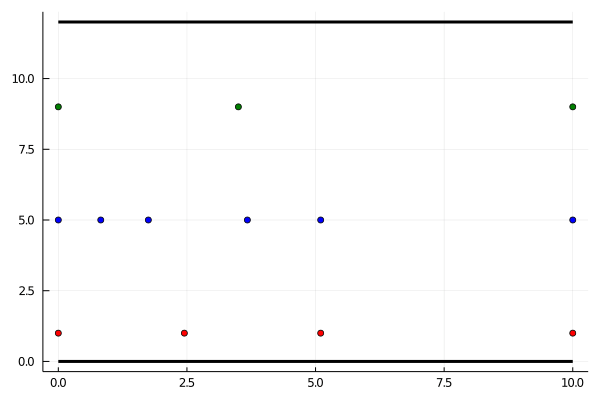

In [12]:
plts[1]

Plots.AnimatedGif("/home/sam/git-clones/Y4-Diss/code/julia/src/anim1.gif")
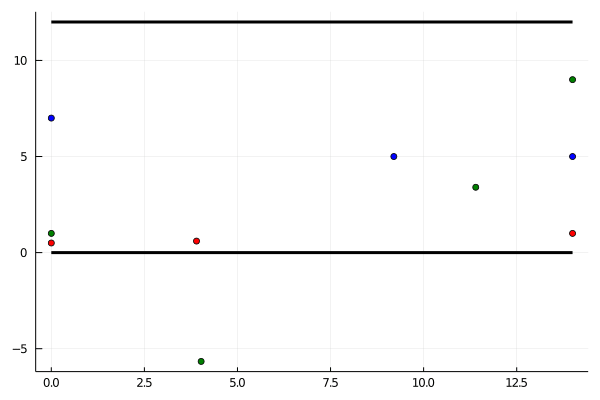

In [13]:
plts[2]

Plots.AnimatedGif("/home/sam/git-clones/Y4-Diss/code/julia/src/anim2.gif")
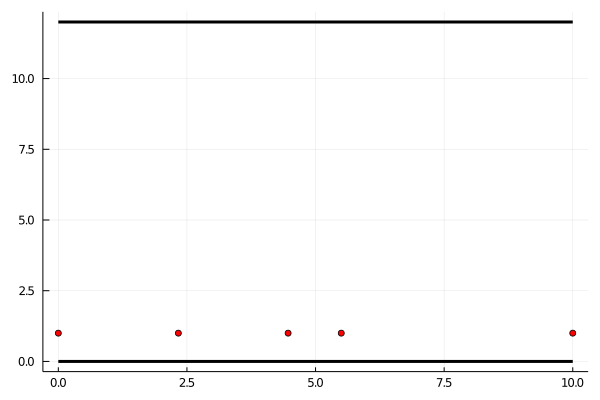

In [14]:
plts[3]

Plots.AnimatedGif("/home/sam/git-clones/Y4-Diss/code/julia/src/anim3.gif")
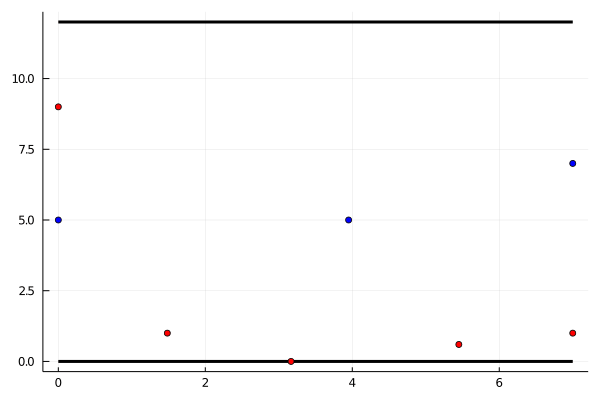

In [15]:
plts[4]

Plots.AnimatedGif("/home/sam/git-clones/Y4-Diss/code/julia/src/anim4.gif")
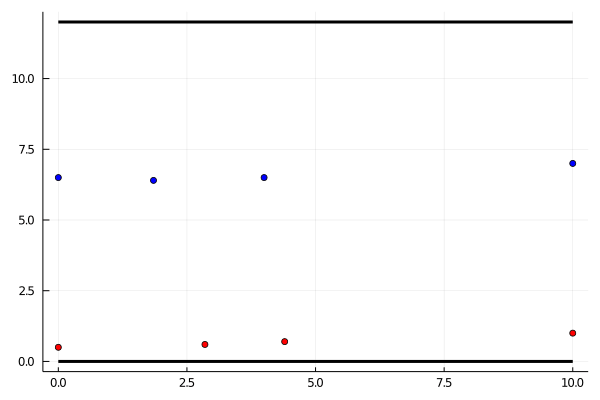

In [16]:
plts[5]